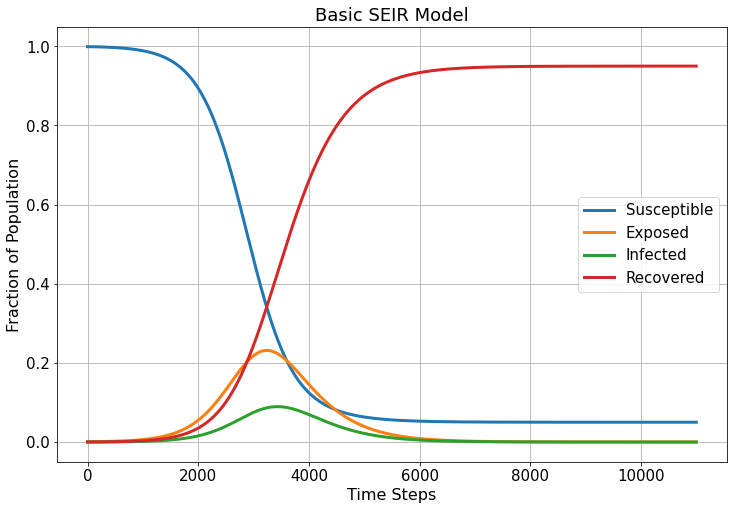

In [2]:
from SEIR import *
import numpy as np
s = SEIR()
run = s.run(t_max=110,dt=0.01)
s.plot(run)

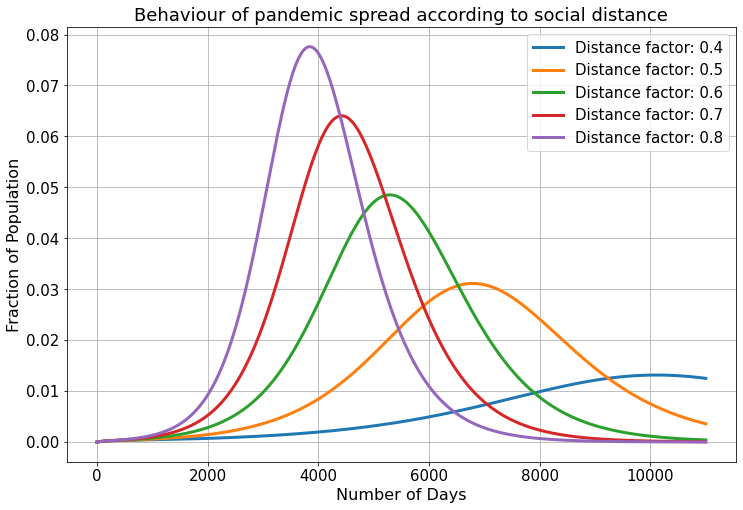

In [3]:
distance_factor = [0.4,0.5,0.6,0.7,0.8]
plt.figure(figsize=(12,8))
for d in distance_factor:
    s = SEIR()
    s.rho=d
    r = s.run(t_max=110,dt=0.01)
    plt.plot(r[:,2],lw=3)
plt.title('Behaviour of pandemic spread according to social distance',fontsize=18)
plt.legend(["Distance factor: "+str(d) for d in distance_factor],
           fontsize=15)
plt.xlabel('Number of Days',fontsize=16)
plt.ylabel('Fraction of Population',fontsize=16)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

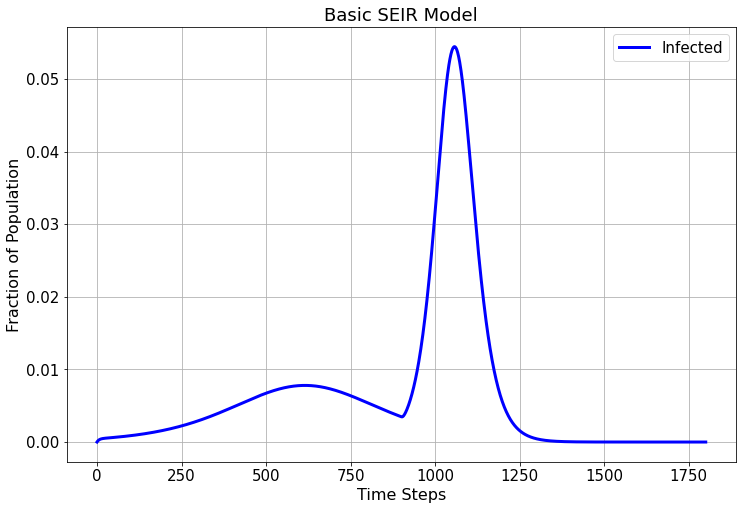

In [7]:
parameters = [0.7,2.1,0.7,0.1]
seir_1 = SEIR(params_ = parameters)
seir_1.rho = 0.4

r1=seir_1.run(t_max=90,dt=0.1)
new_init = seir_1.vals_

s2 = SEIR(init_vals=new_init,params_=parameters)
s2.rho = 0.9
r2=s2.run(t_max=90,dt=0.1,reset=False)
r3=np.vstack((r1,r2))
s2.plot_var(r3[:,2],var_name='Infected')



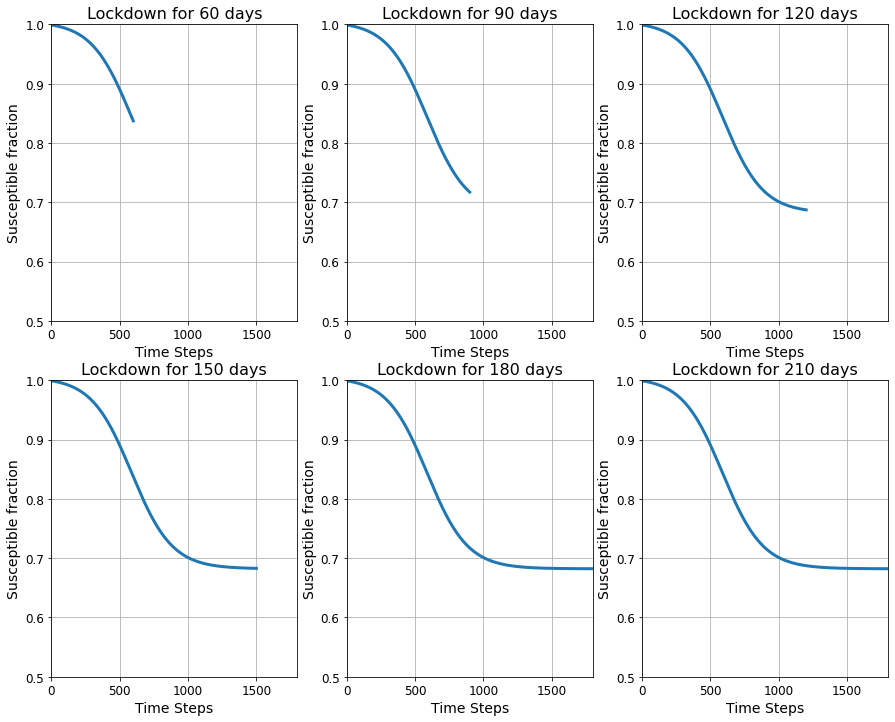

In [15]:
days = [60,90,120,150,180,210]

params = [0.7,2.1,0.7,0.4]
s = SEIR(params_=params)
fig,ax=plt.subplots(2,3,figsize=(15,12))
axes = ax.ravel()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i,d in enumerate(days):
    r=s.run(t_max=d,dt=0.1)
    axes[i].plot(r[:,0],lw=3)
    axes[i].set_title('Lockdown for {} days'.format(d),fontsize=16)
    axes[i].set_xlabel('Time Steps',fontsize=14)
    axes[i].set_ylabel('Susceptible fraction',fontsize=14)
    axes[i].set_xlim(0,1800)
    axes[i].set_ylim(0.5,1.0)
    axes[i].grid(True)
    axes[i].tick_params(labelsize=12)
plt.show()

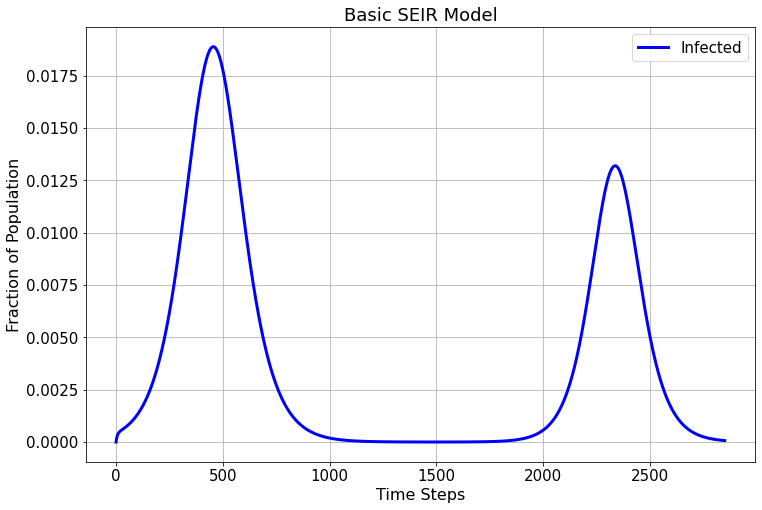

In [17]:
s1 = SEIR(params_=params)
s1.rho=0.45
r1=s1.run(t_max=150,dt=0.1)
new_init = s1.vals_
s2 = SEIR(init_vals=new_init, params_=parameters)
s2.rho = 0.9
r2=s2.run(t_max=135,dt=0.1,reset=False)
r3=np.vstack((r1,r2))
s2.plot_var(r3[:,2],var_name='Infected')

0.07572365893700798
91.35000000000001
0.02967656054200629


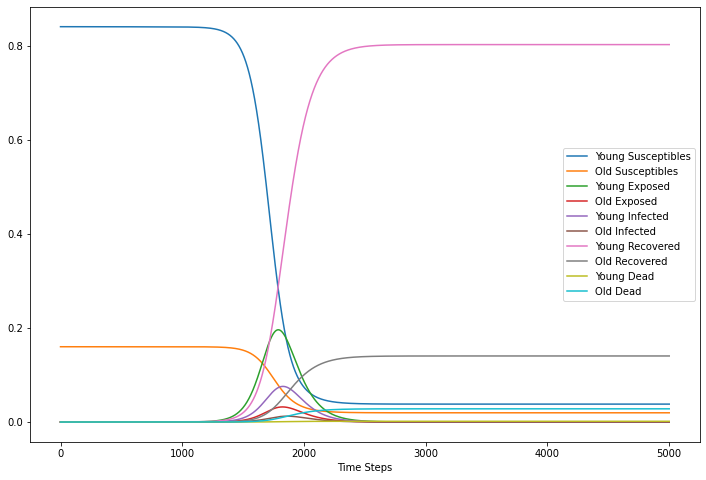

In [18]:
t_max = 250
dt = .05
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 20000
init_vals = 0.84 - 0.5/N, 0.16 - 0.5/N, 0.5/N, 0.5/N, 0, 0, 0, 0, 0, 0
alpha = 0.2
beta1 = 1.75
beta2 = 1
beta3 = 1.75
gamma = 0.5
rho1 = 0.4  # Contact rate between young people
rho2 = 0.25 # Contact rate between young and old people
rho3 = 0.25 # Contact rate between old people
mo1 = 0.001
mo2 = 0.1
params = alpha, beta1, beta2, beta3, gamma, mo1, mo2, rho1, rho2, rho3

def model(init_vals, params, t):
    SY_0, SO_0, EY_0, EO_0, IY_0, IO_0, RY_0, RO_0, MY_0, MO_0 = init_vals
    SY, EY, IY, RY, MY = [SY_0], [EY_0], [IY_0], [RY_0], [MY_0]
    SO, EO, IO, RO, MO = [SO_0], [EO_0], [IO_0], [RO_0], [MO_0]
    alpha, beta1, beta2, beta3, gamma, mo1, mo2, rho1, rho2, rho3 = params
    dt = t[1] - t[0]
    for k in t[1:]:
        if k < 50:
            _rho1 = rho1
            _rho2 = rho2
            _rho3 = rho3
        else:
            _rho1 = 1
            _rho2 = 1
            _rho3 = 1
        next_SY = SY[-1] - (_rho1*beta1*SY[-1]*IY[-1] + _rho2*beta2*SY[-1]*IO[-1])*dt
        next_SO = SO[-1] - (_rho3*beta3*SO[-1]*IO[-1] + _rho2*beta2*SO[-1]*IY[-1])*dt
        next_EY = EY[-1] + (_rho1*beta1*SY[-1]*IY[-1] + _rho2*beta2*SY[-1]*IO[-1] - alpha*EY[-1])*dt
        next_EO = EO[-1] + (_rho3*beta3*SO[-1]*IO[-1] + _rho2*beta2*SO[-1]*IY[-1] - alpha*EO[-1])*dt
        next_IY = IY[-1] + (alpha*EY[-1] - gamma*IY[-1])*dt
        next_IO = IO[-1] + (alpha*EO[-1] - gamma*IO[-1])*dt
        next_RY = RY[-1] + (gamma*IY[-1])*dt
        next_RO = RO[-1] + (gamma*IO[-1])*dt
        next_MY = MY[-1] + (mo1*IY[-1])*dt
        next_MO = MO[-1] + (mo2*IO[-1])*dt
        SY.append(next_SY)
        SO.append(next_SO)
        EY.append(next_EY)
        EO.append(next_EO)
        IY.append(next_IY)
        IO.append(next_IO)
        RY.append(next_RY)
        RO.append(next_RO)
        MY.append(next_MY)
        MO.append(next_MO)
    mx = max(IY)
    print(mx)
    print(IY.index(mx) * 0.05)
    print(MY[-1] + MO[-1])
    return np.stack([SY, SO, EY, EO, IY, IO, RY, RO, MY, MO]).T

# Run simulation
results = model(init_vals, params, t)
# Plot results
plt.figure(figsize=(12,8))
plt.plot(results)
plt.legend(['Young Susceptibles', 'Old Susceptibles', 'Young Exposed', 'Old Exposed', 'Young Infected', 'Old Infected', 'Young Recovered', 'Old Recovered', 'Young Dead', 'Old Dead'])
plt.xlabel('Time Steps')
plt.show()
